In [1]:
import random
import matplotlib.pyplot as plt

def generate_random_value():
    return random.randint(0, 1)

def compute_fitness(individual):
    return sum(individual)

def create_individual(n):
    return [generate_random_value() \
                for _ in range(n)]

def crossover(ind1, ind2, rate=0.9):
    ind1_new = ind1.copy()
    ind2_new = ind2.copy()
    for i in range(len(ind1)):
        if random.random() < rate:
            ind1_new[i] = ind1[i]
            ind2_new[i] = ind2[i]
    return ind1_new, ind2_new

def mutate(individual, rate=0.05):
    return [1 - val if random.random() < rate \
                    else val for val in individual]

def selection(population):
    n_population = len(population)
    idx1 = random.randint(0, n_population - 1)
    idx2 = random.randint(0, n_population - 1)

    fitness_score_1 = compute_fitness(population[idx1])
    fitness_score_2 = compute_fitness(population[idx2])

    if fitness_score_1 > fitness_score_2:
        return population[idx1]
    else:
        return population[idx2]

In [2]:
n = 100  # Length of each individual (binary string)
m = 100  # Population size
generations = 100  # Number of generations
elitism = 2  # Number of elite individuals to carry over

population = [create_individual(n) for _ in range(m)]
fitness_history = []

for gen in range(generations):
    population = sorted(population,
                        key=compute_fitness,
                        reverse=True)

    # Track the best fitness in this generation
    if gen % 10 == 0:
        best_fitness = compute_fitness(population[0])
        fitness_history.append(best_fitness)
        print(f"Generation {gen} - Best Number of 1s: {best_fitness}")

    # Elitism: retain the best individuals
    new_population = population[:elitism]

    while len(new_population) < m:
        parent1, parent2 = selection(population), selection(population)
        child1, child2 = crossover(parent1, parent2)
        new_population.append(mutate(child1))
        new_population.append(mutate(child2))

    population = new_population[:m]

best_individual = sorted(population,
                         key=compute_fitness,
                         reverse=True)[0]
print("Best individual:", best_individual)
print("Best fitness (number of 1s):", compute_fitness(best_individual))
print("Fitness history:", fitness_history)

Generation 0 - Best Number of 1s: 63
Generation 10 - Best Number of 1s: 73
Generation 20 - Best Number of 1s: 75
Generation 30 - Best Number of 1s: 77
Generation 40 - Best Number of 1s: 80
Generation 50 - Best Number of 1s: 82
Generation 60 - Best Number of 1s: 84
Generation 70 - Best Number of 1s: 85
Generation 80 - Best Number of 1s: 85
Generation 90 - Best Number of 1s: 87
Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Best fitness (number of 1s): 88
Fitness history: [63, 73, 75, 77, 80, 82, 84, 85, 85, 87]


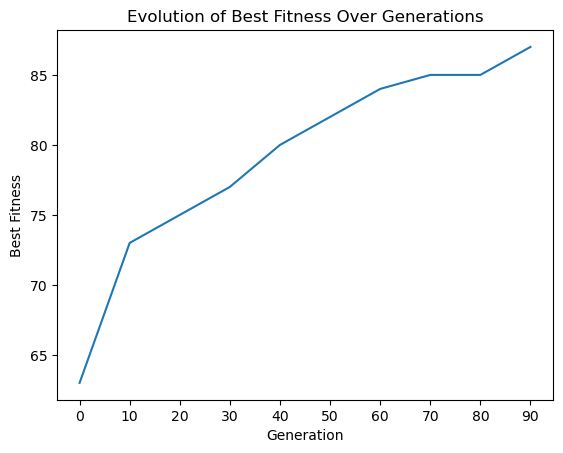

In [3]:
plt.plot(fitness_history)
plt.xlabel('Generation')
plt.xticks(ticks=range(0, len(fitness_history), 1),
           labels=[str(i * 10) for i in range(len(fitness_history))])
plt.ylabel('Best Fitness')
plt.title('Evolution of Best Fitness Over Generations')
plt.show()